# PROJET DATASCIENTEST

## _Peut-on prédire la note d'un films ?_

_source_ https://www.imdb.com/interfaces/

# IMDb Datasets

Subsets of IMDb data are available for access to customers for personal and non-commercial use. You can hold local copies of this data, and it is subject to our terms and conditions. Please refer to the Non-Commercial Licensing and copyright/license and verify compliance.

## Data Location
The dataset files can be accessed and downloaded from https://datasets.imdbws.com/. The data is refreshed daily.

## IMDb Dataset Details

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows: 

In [176]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None


### name.basics.tsv.gz
Contains the following information for names:
* nconst (string) - alphanumeric unique identifier of the name/person
* primaryName (string)– name by which the person is most often credited
* birthYear – in YYYY format
* deathYear – in YYYY format if applicable, else '\N'
* primaryProfession (array of strings)– the top-3 professions of the person
* knownForTitles (array of tconsts) – titles the person is known for

In [2]:
name_basics = pd.read_csv(
    "data/name.basics.tsv", 
    sep="\t", 
    na_values="\\N", 
    index_col=0, 
    nrows=1000
)

In [3]:
name_basics.head()

,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
nconst,,,,,
nm0000001,Fred Astaire,1899.0,1987.0,"soundtrack,actor,miscellaneous","tt0053137,tt0043044,tt0072308,tt0050419"
nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0054452,tt0057345,tt0049189,tt0059956"
nm0000004,John Belushi,1949.0,1982.0,"actor,writer,soundtrack","tt0080455,tt0078723,tt0072562,tt0077975"
nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


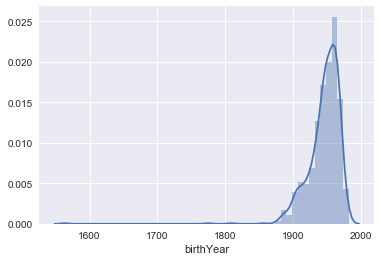

In [63]:
sns.distplot(name_basics.birthYear.dropna())

In [4]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, nm0000001 to nm0001001
Data columns (total 5 columns):
primaryName          1000 non-null object
birthYear            996 non-null float64
deathYear            261 non-null float64
primaryProfession    1000 non-null object
knownForTitles       1000 non-null object
dtypes: float64(2), object(3)
memory usage: 46.9+ KB


In [301]:
primaryProfession = name_basics.primaryProfession.str.split(",", expand=True).stack().to_frame("primaryProfession")
primaryProfession.groupby("primaryProfession").size().nlargest(5)

primaryProfession
producer      567
soundtrack    506
actor         485
actress       390
director      293
dtype: int64

In [304]:
primaryProfession.head(5)

primaryProfession
nconst                       
nm0000001 0        soundtrack
          1             actor
          2     miscellaneous
nm0000002 0           actress
          1        soundtrack

In [306]:
primaryProfessionDummies = pd.get_dummies(primaryProfession).sum(level=0, axis=0)
primaryProfessionDummies.head()

,primaryProfession_actor,primaryProfession_actress,primaryProfession_animation_department,primaryProfession_art_department,primaryProfession_art_director,primaryProfession_assistant_director,primaryProfession_camera_department,primaryProfession_casting_director,primaryProfession_cinematographer,primaryProfession_composer,...,primaryProfession_miscellaneous,primaryProfession_music_department,primaryProfession_producer,primaryProfession_production_designer,primaryProfession_production_manager,primaryProfession_set_decorator,primaryProfession_soundtrack,primaryProfession_special_effects,primaryProfession_stunts,primaryProfession_writer
nconst,,,,,,,,,,,,,,,,,,,,,
nm0000001,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
nm0000002,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
nm0000003,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
nm0000004,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
nm0000005,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
name_basics["primaryProfessionList"] = name_basics["primaryProfession"].str.split(",")
max_primaryProfession = name_basics["primaryProfessionList"].str.len().max()

### create link tables

**link_name_basics_titles** : Link between actors and known movie titles

In [267]:
link_name_basics_titles = (
    name_basics.knownForTitles.str.split(",", expand=True)
    .stack(dropna=True)
    .to_frame("tconst")
    .reset_index()
    .drop("level_1", axis=1)
)

In [269]:
link_name_basics_titles.head(5)

,nconst,tconst
0,nm0000001,tt0053137
1,nm0000001,tt0043044
2,nm0000001,tt0072308
3,nm0000001,tt0050419
4,nm0000002,tt0038355


In [285]:
avgRatingName = link_name_basics_titles.set_index("tconst").join(title_ratings)
avgRatingName = avgRatingName.dropna().groupby("nconst")["averageRating"].mean().to_frame("avgRatingName")

In [286]:
avgRatingName.head()

,avgRatingName
nconst,
nm0000017,7.20
nm0000022,8.10
nm0000036,7.90
nm0000048,8.30
nm0000050,7.75


In [312]:
avgRatingNameProfession = primaryProfessionDummies.join(avgRatingName).dropna()
avgRatingNameProfession = avgRatingNameProfession.drop("avgRatingName", axis=1).multiply(avgRatingNameProfession.avgRatingName, axis=0)

In [315]:
avgRatingNameProfession.head(5)

,primaryProfession_actor,primaryProfession_actress,primaryProfession_animation_department,primaryProfession_art_department,primaryProfession_art_director,primaryProfession_assistant_director,primaryProfession_camera_department,primaryProfession_casting_director,primaryProfession_cinematographer,primaryProfession_composer,...,primaryProfession_miscellaneous,primaryProfession_music_department,primaryProfession_producer,primaryProfession_production_designer,primaryProfession_production_manager,primaryProfession_set_decorator,primaryProfession_soundtrack,primaryProfession_special_effects,primaryProfession_stunts,primaryProfession_writer
nconst,,,,,,,,,,,,,,,,,,,,,
nm0000017,0.00,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.2,0.0,0.0,0.0,0.0,7.20,0.0,0.0,0.00
nm0000022,8.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.1,0.0,0.0,0.0,8.10,0.0,0.0,0.00
nm0000036,7.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.90
nm0000048,8.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.30,0.0,0.0,8.30
nm0000050,7.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.75,0.0,0.0,7.75


### **title.akas.tsv.gz**
Contains the following information for titles:
* titleId (string) - a tconst, an alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* title (string) – the localized title
* region (string) - the region for this version of the title
* language (string) - the language of the title
* types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
* attributes (array) - Additional terms to describe this alternative title, not enumerated
* isOriginalTitle (boolean) – 0: not original title; 1: original title

In [111]:
title_akas = pd.read_csv(
    "data/title.akas.tsv", 
    sep="\t", 
    na_values="\\N",
    index_col=[0,1],
    nrows=10000
)

In [113]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000 entries, (tt0000001, 1) to (tt0004707, 26)
Data columns (total 6 columns):
title              10000 non-null object
region             8159 non-null object
language           340 non-null object
types              3378 non-null object
attributes         504 non-null object
isOriginalTitle    10000 non-null int64
dtypes: int64(1), object(5)
memory usage: 534.7+ KB


In [114]:
title_akas.groupby("region").size().nlargest(5)

region
US    3968
FR     624
GB     461
DK     444
ES     374
dtype: int64

In [130]:
originalTitle = title_akas[title_akas.isOriginalTitle == 1][["title", "region"]]

In [137]:
originalTitle.head(10)

,,title,region,nLetters,nCapitalLetters,nWords
titleId,ordering,,,,,
tt0000001,5,Carmencita,NaN,10,1,1
tt0000002,1,Le clown et ses chiens,NaN,22,1,5
tt0000003,4,Pauvre Pierrot,NaN,14,2,2
tt0000004,1,Un bon bock,NaN,11,1,3
tt0000005,8,Blacksmith Scene,NaN,16,2,2
tt0000006,5,Chinese Opium Den,NaN,17,3,3
tt0000007,2,Corbett and Courtney Before the Kinetograph,NaN,43,4,6
tt0000008,4,Edison Kinetoscopic Record of a Sneeze,NaN,38,4,6
tt0000009,1,Miss Jerry,NaN,10,2,2


In [120]:
originalTitle.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1503 entries, (tt0000001, 5) to (tt0004707, 18)
Data columns (total 4 columns):
title              1503 non-null object
nLetters           1503 non-null int64
nCapitalLetters    1503 non-null int64
nWords             1503 non-null int64
dtypes: int64(3), object(1)
memory usage: 88.1+ KB


### **title.basics.tsv.gz**
Contains the following information for titles:
* tconst (string) - alphanumeric unique identifier of the title
* titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
* primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
* originalTitle (string) - original title, in the original language
* isAdult (boolean) - 0: non-adult title; 1: adult title
* startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
* endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
* runtimeMinutes – primary runtime of the title, in minutes
* genres (string array) – includes up to three genres associated with the title

In [140]:
title_basics = pd.read_csv("data/title.basics.tsv", sep="\t", na_values="\\N", index_col=0, nrows=10000)

In [179]:
title_basics.head(10)

,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,
tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1.0,"Documentary,Short"
tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5.0,"Animation,Short"
tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4.0,"Animation,Comedy,Romance"
tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,NaN,"Animation,Short"
tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1.0,"Comedy,Short"
tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1.0,Short
tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NaN,1.0,"Short,Sport"
tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,NaN,1.0,"Documentary,Short"
tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45.0,Romance


In [180]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0000001 to tt0010133
Data columns (total 8 columns):
titleType         10000 non-null object
primaryTitle      10000 non-null object
originalTitle     10000 non-null object
isAdult           10000 non-null int64
startYear         10000 non-null int64
endYear           0 non-null float64
runtimeMinutes    3244 non-null float64
genres            9317 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 1023.1+ KB


In [177]:
primaryTitle = title_basics[["primaryTitle"]]
primaryTitle["nLetters"] = primaryTitle.primaryTitle.str.len()
primaryTitle["nCapitalLetters"] = primaryTitle.primaryTitle.apply(lambda x: sum(1 for c in x if c.isupper()))
primaryTitle["nWords"] = primaryTitle.primaryTitle.str.split("\W").str.len()

In [178]:
primaryTitle.head()

,primaryTitle,nLetters,nCapitalLetters,nWords
tconst,,,,
tt0000001,Carmencita,10,1,1
tt0000002,Le clown et ses chiens,22,1,5
tt0000003,Pauvre Pierrot,14,2,2
tt0000004,Un bon bock,11,1,3
tt0000005,Blacksmith Scene,16,2,2


In [166]:
genres = title_basics.genres.str.lower().str.split(",", expand=True).stack(dropna=True).to_frame("genre")
genres.groupby("genre").size().nlargest(10)

genre
short          5628
drama          4610
comedy         2806
western         819
romance         700
animation       391
documentary     378
crime           292
adventure       249
war             202
dtype: int64

In [209]:
genresDummies = pd.get_dummies(genres).sum(level=0)
genresDummies.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_documentary,genre_drama,genre_family,genre_fantasy,...,genre_musical,genre_mystery,genre_news,genre_romance,genre_sci-fi,genre_short,genre_sport,genre_thriller,genre_war,genre_western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0000001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
tt0000002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
tt0000003,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
tt0000004,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
tt0000005,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### **title.crew.tsv.gz**
Contains the director and writer information for all the titles in IMDb. Fields include:
* tconst (string) - alphanumeric unique identifier of the title
* directors (array of nconsts) - director(s) of the given title
* writers (array of nconsts) – writer(s) of the given title

In [19]:
title_crew = pd.read_csv("data/title.crew.tsv", sep="\t", na_values="\\N", index_col=0)

In [54]:
title_crew.head(10)

,directors,writers
tconst,,
tt0000001,nm0005690,NaN
tt0000002,nm0721526,NaN
tt0000003,nm0721526,NaN
tt0000004,nm0721526,NaN
tt0000005,nm0005690,NaN
tt0000006,nm0005690,NaN
tt0000007,"nm0374658,nm0005690",NaN
tt0000008,nm0005690,NaN
tt0000009,nm0085156,nm0085156


In [48]:
link_title_directors = (
    title_crew.iloc[:1000, :].directors
    .str.split(",", expand=True)
    .stack(dropna=True)
    .reset_index()
    .drop("level_1", axis=1)
    .rename(columns={0: "nconsts"})
)

In [49]:
link_title_directors.head()

,tconst,nconsts
0,tt0000001,nm0005690
1,tt0000002,nm0721526
2,tt0000003,nm0721526
3,tt0000004,nm0721526
4,tt0000005,nm0005690


In [50]:
link_title_writers = (
    title_crew.iloc[:1000, :].writers
    .str.split(",", expand=True)
    .stack(dropna=True)
    .reset_index()
    .drop("level_1", axis=1)
    .rename(columns={0: "nconsts"})
)

In [51]:
link_title_writers.head()

,tconst,nconsts
0,tt0000009,nm0085156
1,tt0000036,nm0410331
2,tt0000076,nm0410331
3,tt0000091,nm0617588
4,tt0000108,nm0410331


### **title.episode.tsv.gz**
Contains the tv episode information. Fields include:
* tconst (string) - alphanumeric identifier of episode
* parentTconst (string) - alphanumeric identifier of the parent TV Series
* seasonNumber (integer) – season number the episode belongs to
* episodeNumber (integer) – episode number of the tconst in the TV series

In [52]:
title_episode = pd.read_csv("data/title.episode.tsv", sep="\t", na_values="\\N")

In [53]:
title_episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1.0,9.0
1,tt0042816,tt0989125,1.0,17.0
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3.0,42.0
4,tt0043631,tt0989125,2.0,16.0


### **title.principals.tsv.gz**
Contains the principal cast/crew for titles
* tconst (string) - alphanumeric unique identifier of the title
* ordering (integer) – a number to uniquely identify rows for a given titleId
* nconst (string) - alphanumeric unique identifier of the name/person
* category (string) - the category of job that person was in
* job (string) - the specific job title if applicable, else '\N'
* characters (string) - the name of the character played if applicable, else '\N'

In [182]:
title_principals = pd.read_csv("data/title.principals.tsv", sep="\t", na_values="\\N", index_col=0, nrows=10000)

In [183]:
title_principals.head(10)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0000001,1,nm1588970,self,NaN,"[""Herself""]"
tt0000001,2,nm0005690,director,NaN,NaN
tt0000001,3,nm0374658,cinematographer,director of photography,NaN
tt0000002,1,nm0721526,director,NaN,NaN
tt0000002,2,nm1335271,composer,NaN,NaN
tt0000003,1,nm0721526,director,NaN,NaN
tt0000003,2,nm5442194,producer,producer,NaN
tt0000003,3,nm1335271,composer,NaN,NaN
tt0000003,4,nm5442200,editor,NaN,NaN


### **title.ratings.tsv.gz**
Contains the IMDb rating and votes information for titles
* tconst (string) - alphanumeric unique identifier of the title
* averageRating – weighted average of all the individual user ratings
* numVotes - number of votes the title has received

In [191]:
title_ratings = pd.read_csv("data/title.ratings.tsv", sep="\t", na_values="\\N", nrows=10000, index_col=0)

In [192]:
title_ratings.head()

,averageRating,numVotes
tconst,,
tt0000001,5.8,1518
tt0000002,6.3,184
tt0000003,6.6,1164
tt0000004,6.3,113
tt0000005,6.2,1873


In [193]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0000001 to tt0026581
Data columns (total 2 columns):
averageRating    10000 non-null float64
numVotes         10000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 234.4+ KB


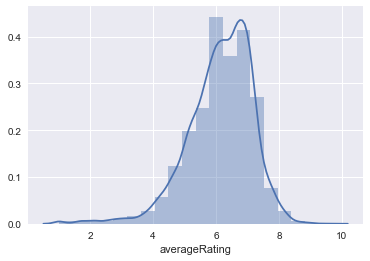

In [196]:
sns.distplot(title_ratings.averageRating, bins=20)

# Modeling database

In [236]:
titleBasicsData = title_basics[["isAdult", "startYear"]]

In [237]:
df = title_ratings
df = pd.merge(df, primaryTitle.drop("primaryTitle", axis=1), left_index=True, right_index=True)
df = pd.merge(df, genresDummies, left_index=True, right_index=True)
df = pd.merge(df, titleBasicsData, left_index=True, right_index=True)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2362 entries, tt0000001 to tt0010133
Data columns (total 30 columns):
averageRating        2362 non-null float64
numVotes             2362 non-null int64
nLetters             2362 non-null int64
nCapitalLetters      2362 non-null int64
nWords               2362 non-null int64
genre_action         2362 non-null uint8
genre_adventure      2362 non-null uint8
genre_animation      2362 non-null uint8
genre_biography      2362 non-null uint8
genre_comedy         2362 non-null uint8
genre_crime          2362 non-null uint8
genre_documentary    2362 non-null uint8
genre_drama          2362 non-null uint8
genre_family         2362 non-null uint8
genre_fantasy        2362 non-null uint8
genre_history        2362 non-null uint8
genre_horror         2362 non-null uint8
genre_music          2362 non-null uint8
genre_musical        2362 non-null uint8
genre_mystery        2362 non-null uint8
genre_news           2362 non-null uint8
genre_romance        2

In [252]:
data = df.drop("averageRating", axis=1)
target = (df.averageRating >= 5) * 1

In [253]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data)

data_scaled = sc.transform(data)

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, random_state=12345)

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
lr.fit(X_train, y_train)

confusion_matrix(y_test, lr.predict(X_test))

array([[  3, 125],
       [  7, 456]])

In [242]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [243]:
lr.score(X_test, y_test)

0.077472441091116062